# Regressao Linear com GraphLab
##### @autor: Marku Vinícius da Silva
##### @data: 27/Maio/2017

## Importa as bibliotecas utilizadas no projeto

In [1]:
import graphlab
import matplotlib.pyplot as plt

/Users/Marku/anaconda/envs/gl-env/lib/python2.7/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory
  stacklevel=stacklevel + 1):


This non-commercial license of GraphLab Create for academic use is assigned to markuvinicius@gmail.com and will expire on May 19, 2018.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1495897619.log


## Carrega o dataset com as features das casas

In [164]:
path_sales = '/Users/Marku/Documents/data_center/Workspace/ML-Specialization/Course1/week2/home_data.gl'

sales = graphlab.SFrame(path_sales)
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


## Data Exploration: Distribuição de valores por CEP.

In [149]:
graphlab.canvas.set_target('ipynb')
sales.show(view='BoxWhisker Plot',x='zipcode',y='price')
sales.show(view='Scatter Plot', x='sqft_living',y='price')

#sales.show?

## Computa os preços agrupados por CEP.

In [21]:
grouped_zipcodes = sales.groupby(['zipcode'],{'count' : graphlab.aggregate.COUNT('zipcode'),
                                                'max'   : graphlab.aggregate.MAX('price'),
                                                'min'   : graphlab.aggregate.MIN('price'),
                                                'mean'  : graphlab.aggregate.MEAN('price'),
                                                'avg'   : graphlab.aggregate.AVG('price'),
                                                'stdv'  : graphlab.aggregate.STDV('price')                                                                                              
                                               })

In [22]:
# 20 ceps com os maiores valores médios de casas
grouped_zipcodes.topk('mean',20)

zipcode,count,stdv,min,max,avg,mean
98039,50,1154753.65503,787500,6885000,2160606.6,2160606.6
98004,317,744642.786035,425000,7062500,1355927.09779,1355927.09779
98040,282,606415.397468,500000,5300000,1194230.00355,1194230.00355
98112,269,592654.895805,169317,3400000,1095499.36803,1095499.36803
98102,105,782907.143747,330000,7700000,901258.238095,901258.238095
98109,109,453135.747577,216650,3200000,879623.623853,879623.623853
98105,229,476244.312704,380000,3650000,862825.231441,862825.231441
98006,498,445463.631927,247500,4208000,859684.763052,859684.763052
98119,184,432542.328992,300523,3065000,849448.01087,849448.01087
98005,168,267952.66931,400000,1960000,810164.880952,810164.880952


## Seleciona casas com área >= 2000 e <= 4000

In [29]:
high_sqtf_living = sales[(sales['sqft_living'] >= 2000) & (sales['sqft_living'] <= 4000)]

In [147]:
fraction =  float(len(high_sqtf_living)) / float(len(sales))
print fraction

0.426641373248


# Elaboração do modelo de regressão

## plota as relações entre as features básicas e o preço da casa

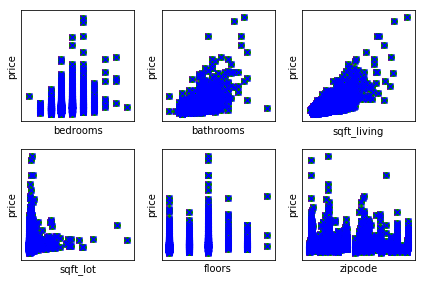

In [142]:
%matplotlib inline

fig,axes = plt.subplots(2, 3)
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
color_markers = [
                    ("r", ">"),
                    ('g', "o"),
                    ('b', "x"),
                ]

for i, (p0, p1) in enumerate(pairs):
    ax = axes.flat[i]
    #print i+1
    #print test_data[basic_features[i]]

    for t in range(3):
        c,marker = color_markers[t]
        ax.scatter(test_data[basic_features[i]],test_data['price'],marker=marker,c=c)
        ax.set_xlabel(basic_features[i])
        ax.set_ylabel('price')
        ax.set_xticks([])
        ax.set_yticks([])
    fig.tight_layout()
            

In [158]:
# separa o dataset original em 2 novos datasets de treinamento e teste
train_data , test_data = sales.random_split(fraction=0.8,seed=0)

In [159]:
# separa as features que serão utilizadas no modelo de regressão

# features para o modelo básico (comparação)
basic_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

# features para o modelo avançado
advanced_features = [
                    'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
                    'condition', # condition of house				
                    'grade', # measure of quality of construction				
                    'waterfront', # waterfront property				
                    'view', # type of view				
                    'sqft_above', # square feet above ground				
                    'sqft_basement', # square feet in basement				
                    'yr_built', # the year built				
                    'yr_renovated', # the year renovated				
                    'lat', 'long', # the lat-long of the parcel				
                    'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
                    'sqft_lot15', # average lot size of 15 nearest neighbors 
                    ]

In [160]:
basic_model = graphlab.regression.linear_regression.create( test_data , target = 'price' , features = basic_features , validation_set= None)

advanced_model = graphlab.regression.linear_regression.create( test_data , target = 'price' , features = advanced_features , validation_set= None)

Linear regression:

--------------------------------------------------------

Number of examples          : 4229

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 109

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.010306     | 1994137.797694     | 164525.157016 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 4229

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 121

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.028392     | 1662718.214921     | 137517.260286 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [161]:
print basic_model.evaluate(test_data)
print advanced_model.evaluate(test_data)

{'max_error': 1994137.797693518, 'rmse': 164525.1570163549}
{'max_error': 1662718.2149206817, 'rmse': 137517.26028633775}


In [162]:
print basic_model.evaluate(test_data)['rmse'] - advanced_model.evaluate(test_data)['rmse']

27007.89673
